In [1]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_687356/327059659.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%autoreload

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import scripts
print(scripts.__path__)
import pathlib


from scripts.common.schemas import TypeCollectionCategory
from scripts.infer.structure import DatasetFolderStructure

dataset = DatasetFolderStructure(pathlib.Path(
    "/nfs/home/bsparks/mdti4py/datasets/better-types-4-py-dataset"
))
assert dataset.dataset_root.is_dir(), f"{dataset.dataset_root} not a directory!"

print(dataset)

['/nfs/home/bsparks/mdti4py/scripts/scripts']


2023-09-23 14:21:53.332852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 14:21:54.061092: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


BetterTypes4Py @ /nfs/home/bsparks/mdti4py/datasets/better-types-4-py-dataset


In [6]:
import importlib
import experiments.inferred

In [7]:
artifact_root = pathlib.Path("/nfs/home/bsparks/mdti4py/datasets")
assert artifact_root.is_dir(), f"Cannot find {artifact_root=}"

# Ground Truth

In [8]:
importlib.reload(experiments.inferred)
groundtruth = experiments.inferred.load_groundtruths(artifact_root, dataset)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/extended_ground_truth.csv: 100%|█| 50/50 [00:
/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/context.csv: 100%|█| 50/50 [00:00<00:00, 153.


In [9]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno
34968,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN
34969,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN
34970,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN
34971,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN
34972,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN
34973,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN
34974,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN
34975,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult
34976,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN
34977,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN


In [10]:
trivial_mask = groundtruth["adjusted_anno"].isin(["None", "Any"])
groundtruth = groundtruth[~trivial_mask]

groundtruth

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository
0,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.backend_id,MessageSchema.backend_idλ1,NaN,NaN,NaN,NaN,nubark__instark
1,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.recipient_id,MessageSchema.recipient_idλ1,NaN,NaN,NaN,NaN,nubark__instark
2,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.title,MessageSchema.titleλ1,NaN,NaN,NaN,NaN,nubark__instark
3,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.content,MessageSchema.contentλ1,NaN,NaN,NaN,NaN,nubark__instark
4,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.kind,MessageSchema.kindλ1,NaN,NaN,NaN,NaN,nubark__instark
...,...,...,...,...,...,...,...,...,...
58474,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.param_mapping,analyze.param_mappingλ1,"typing.Dict[axion.handler.model.OASParam, axio...","typing.Dict[axion.handler.model.OASParam, axio...","Dict[OASParam, FunctionArgName]",Dict,kornicameister__axion
58476,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.handler_param_name,analyze.handler_param_nameλ1,NaN,NaN,NaN,NaN,kornicameister__axion
58477,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.handler_param_type,analyze.handler_param_typeλ1,NaN,NaN,NaN,NaN,kornicameister__axion
58478,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.op_param_type,analyze.op_param_typeλ1,NaN,NaN,NaN,NaN,kornicameister__axion


In [11]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno
34968,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN
34969,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN
34970,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN
34971,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN
34972,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN
34973,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN
34974,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN
34975,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult
34976,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN
34977,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN


In [12]:
print("=== Label Counts === ")
print(f"{groundtruth.raw_anno.notna().sum()=}, {groundtruth.adjusted_anno.notna().sum()=}, {groundtruth.base_anno.notna().sum()=}")

=== Label Counts === 
groundtruth.raw_anno.notna().sum()=15910, groundtruth.adjusted_anno.notna().sum()=15910, groundtruth.base_anno.notna().sum()=15910


In [13]:
print(groundtruth.raw_anno.value_counts())
print(groundtruth.raw_anno.value_counts(normalize=True))

raw_anno
builtins.str                                                                    3142
builtins.int                                                                    1158
builtins.bool                                                                    809
tests.basilisp.helpers.CompileFn                                                 415
typing.Optional[builtins.str]                                                    278
                                                                                ... 
typing.Dict[builtins.str, wkconnect.backends.neuroglancer.backend.DecoderFn]       1
typing.Optional[wkconnect.backends.neuroglancer.meshes.Meshfile]                   1
typing.List[wkconnect.backends.neuroglancer.backend.Chunk]                         1
wkconnect.backends.neuroglancer.backend.DecoderFn                                  1
typing.Dict[builtins.str, typing.Type[t.Any]]                                      1
Name: count, Length: 2730, dtype: int64
raw_anno
builtin

In [14]:
print(groundtruth.adjusted_anno.value_counts())
print(groundtruth.adjusted_anno.value_counts(normalize=True))

adjusted_anno
str                                                 3515
int                                                 1303
bool                                                 938
CompileFn                                            415
Dict                                                 237
                                                    ... 
List[_PathValidationResultAsJson]                      1
List[_CertificateDeploymentAnalysisResultAsJson]       1
Generator[ServerScanResult, None, None]                1
CompressionScanResultAsJson                            1
Sequence[DV]                                           1
Name: count, Length: 1828, dtype: int64
adjusted_anno
str                                                 0.220930
int                                                 0.081898
bool                                                0.058957
CompileFn                                           0.026084
Dict                                                0.014896


In [15]:
print(groundtruth.base_anno.value_counts())
print(groundtruth.base_anno.value_counts(normalize=True))

base_anno
str                                            3515
int                                            1303
List                                           1017
bool                                            938
Dict                                            726
                                               ... 
InvalidServerStringAsJson                         1
InvalidServerStringError                          1
CertificateInfoExtraArgumentAsJson                1
SessionResumptionSupportExtraArgumentAsJson       1
OASResponseCode                                   1
Name: count, Length: 1133, dtype: int64
base_anno
str                                            0.220930
int                                            0.081898
List                                           0.063922
bool                                           0.058957
Dict                                           0.045632
                                                 ...   
InvalidServerStringAsJson       

In [16]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"]

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository
34968,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.__init__,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN,sonic182__aiosonic
34969,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.self,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN,sonic182__aiosonic
34970,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connector,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN,sonic182__aiosonic
34971,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.pool_size,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN,sonic182__aiosonic
34972,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connection_cls,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN,sonic182__aiosonic
34973,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.acquire,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN,sonic182__aiosonic
34974,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire.self,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN,sonic182__aiosonic
34975,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire._urlparsed,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult,sonic182__aiosonic
34976,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.release,CyclicQueuePool.release,NaN,NaN,NaN,NaN,sonic182__aiosonic
34977,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.release.self,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN,sonic182__aiosonic


In [17]:
from scripts.common.schemas import ExtendedTypeCollectionSchema

import experiments.inferred
from experiments.predictions import ubiquitous_types, co_occurrences

import pandera.typing as pt, pandas as pd, seaborn as sns
import importlib

import matplotlib.pyplot as plt

def adjusted_pipeline(tool: str, groundtruth: pt.DataFrame[ExtendedTypeCollectionSchema]) -> pd.DataFrame:
    importlib.reload(experiments.inferred)
    print(f"Loaded inferred")
    
    inferred = experiments.inferred.load_entire_inferred(artifact_root, dataset, tool_name=tool, task="all")
    experiments.inferred.error_if_duplicate_keys(inferred)
    print(f"No duplicate keys found")

    adjusted = experiments.inferred.typet5_adjusted_form(inferred)
    print(f"Converted to adjusted form")

    trivial_mask = groundtruth.adjusted_anno.str.endswith((".None", ".Any")) | groundtruth.adjusted_anno.isin(["None", "Any"])
    groundtruth = groundtruth[~trivial_mask]
    print("Removed trivial types from groundtruth (None and Any)")

    aligned = experiments.inferred.join_truth_to_preds(
        truth=groundtruth, 
        predictions=adjusted, 
        comparable_anno=ExtendedTypeCollectionSchema.adjusted_anno,
    )
    print(f"{aligned.shape}")
    print(f"Joined ground truth to predictions")
    
    evaluatable = experiments.inferred.evaluatable(aligned)
    assert evaluatable["gt_anno"].notna().all()
    assert evaluatable["anno"].notna().all()
    
    print(f"Reduced to evaluatable: {evaluatable.shape}")
    return evaluatable

def base_pipeline(tool: str, groundtruth: pt.DataFrame[ExtendedTypeCollectionSchema]) -> pd.DataFrame:
    importlib.reload(experiments.inferred)   
    inferred = experiments.inferred.load_entire_inferred(artifact_root, dataset, tool_name=tool, task="all")
    print(f"Loaded inferred")
    
    experiments.inferred.error_if_duplicate_keys(inferred)
    print(f"No duplicate keys found")

    adjusted = experiments.inferred.typet5_base_form(inferred)
    print(f"Converted to base form")

    trivial_mask = groundtruth.base_anno.isin(["None", "Any"])
    groundtruth = groundtruth[~trivial_mask]
    print("Removed trivial types from groundtruth (None and Any)")

    aligned = experiments.inferred.join_truth_to_preds(
        truth=groundtruth, 
        predictions=adjusted, 
        comparable_anno=ExtendedTypeCollectionSchema.base_anno,
    )
    print(f"{aligned.shape}")
    print(f"Joined ground truth to predictions")
    
    evaluatable = experiments.inferred.evaluatable(aligned)
    assert evaluatable["gt_anno"].notna().all()
    assert evaluatable["anno"].notna().all()
    
    print(f"Reduced to evaluatable: {evaluatable.shape}")
    return evaluatable

# Monkeytype

In [18]:
monkeytype_adjusted = adjusted_pipeline(tool="monkeytype", groundtruth=groundtruth)

Loaded inferred


/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/monkeytype/all/inferred.csv: 100%|█| 50/50 [0


Loaded 19 inference artifacts
No duplicate keys found


100%|██████████████████████████████████████████████████████████████████████| 17567/17567 [00:00<00:00, 399369.84it/s]


Converted to adjusted form
Removed trivial types from groundtruth (None and Any)
(51272, 10)
Joined ground truth to predictions
Reduced to evaluatable: (15629, 10)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


In [19]:
display(monkeytype_adjusted)

,file,category,qname,qname_ssa,gt_anno,repository,trait_gt_form,anno,method,topn
8,instark/core/suppliers/common/tenancy/schema_t...,CALLABLE_PARAMETER,SchemaTenantSupplier.__init__.connection,SchemaTenantSupplier.__init__.connection,SchemaConnection,nubark__instark,SchemaConnection,<MISSING>,NaN,NaN
9,instark/core/suppliers/common/tenancy/schema_t...,CALLABLE_PARAMETER,SchemaTenantSupplier.__init__.zones,SchemaTenantSupplier.__init__.zones,"Dict[str, str]",nubark__instark,Dict,<MISSING>,NaN,NaN
11,instark/presenters/rest/rest.py,CALLABLE_PARAMETER,RestApplication.__init__.config,RestApplication.__init__.config,Config,nubark__instark,Config,<MISSING>,NaN,NaN
12,instark/presenters/rest/rest.py,CALLABLE_PARAMETER,RestApplication.__init__.injector,RestApplication.__init__.injector,Injectark,nubark__instark,Injectark,<MISSING>,NaN,NaN
14,instark/presenters/rest/rest.py,CALLABLE_PARAMETER,RestApplication.run.app,RestApplication.run.app,Application,nubark__instark,Application,<MISSING>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
51263,axion/handler/analysis/path_query_arg.py,CALLABLE_RETURN,analyze,analyze,"Tuple[Set, ParamMapping]",kornicameister__axion,Tuple,<MISSING>,NaN,NaN
51264,axion/handler/analysis/path_query_arg.py,CALLABLE_PARAMETER,analyze.parameters,analyze.parameters,Sequence[OASParameter],kornicameister__axion,Sequence,<MISSING>,NaN,NaN
51265,axion/handler/analysis/path_query_arg.py,CALLABLE_PARAMETER,analyze.signature,analyze.signature,"Dict[str, Type]",kornicameister__axion,Dict,<MISSING>,NaN,NaN
51266,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.errors,analyze.errorsλ1,Set[Error],kornicameister__axion,Set,<MISSING>,NaN,NaN


In [20]:
monkeytype_base = base_pipeline(tool="monkeytype", groundtruth=groundtruth)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/monkeytype/all/inferred.csv: 100%|█| 50/50 [0


Loaded 19 inference artifacts
Loaded inferred
No duplicate keys found


100%|██████████████████████████████████████████████████████████████████████| 17567/17567 [00:00<00:00, 385901.54it/s]


Converted to base form
Removed trivial types from groundtruth (None and Any)
(51272, 10)
Joined ground truth to predictions
Reduced to evaluatable: (15629, 10)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


In [21]:
monkeytype_adjusted = monkeytype_adjusted[monkeytype_adjusted["category"] != TypeCollectionCategory.VARIABLE]
monkeytype_base = monkeytype_base[monkeytype_base["category"] != TypeCollectionCategory.VARIABLE]

In [22]:
experiments.predictions.performance(monkeytype_adjusted.replace("<MISSING>", pd.NA), total=True)

,observations,predictions,unassigned,matches,stracc,relacc
ubiq,4946,475,4471,422,0.085321,0.888421
common,4667,288,4379,93,0.019927,0.322917
rare,2451,110,2341,56,0.022848,0.509091
total,12064,873,11191,571,0.047331,0.654066


In [23]:
experiments.predictions.performance(monkeytype_base.replace("<MISSING>", pd.NA), total=True)

,observations,predictions,unassigned,matches,stracc,relacc
ubiq,4946,475,4471,465,0.094015,0.978947
common,4667,288,4379,137,0.029355,0.475694
rare,2451,110,2341,56,0.022848,0.509091
total,12064,873,11191,658,0.054542,0.753723


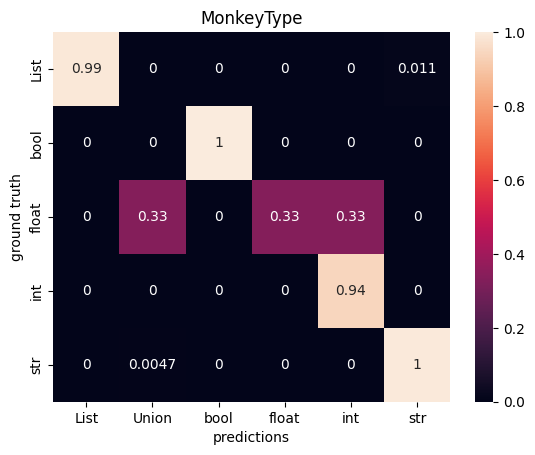

<Figure size 500x1000 with 0 Axes>

In [24]:
thres_figs, ax1 = plt.subplots(nrows=1)

importlib.reload(experiments.predictions)
monkeytype_base_ubiq = experiments.predictions.ubiquitous_types(monkeytype_base.replace("<MISSING>", pd.NA))

ax1.set_title('MonkeyType')
co_occurrences(monkeytype_base_ubiq, truth="gt_anno", pred="anno", threshold=0.08, figsize=(5, 10), ax=ax1)

plt.tight_layout()
plt.show()

In [25]:
monkeytype_adjusted[["gt_anno", "anno" ]].replace("<MISSING>", pd.NA).value_counts()

gt_anno        anno                                                                           
str            str                                                                                213
int            int                                                                                103
bool           bool                                                                                59
List[int]      List[int]                                                                           33
Mock           MagicMock                                                                           26
                                                                                                 ... 
List[File]     List[Union[File, Any]]                                                               1
List[List]     List[List[int]]                                                                      1
List[Mapping]  List[Dict[str, Union[float, int, str]]]                                   

In [26]:
monkeytype_base[["gt_anno", "anno" ]].replace("<MISSING>", pd.NA).value_counts()

gt_anno            anno             
str                str                  213
int                int                  103
List               List                  89
bool               bool                  59
Dict               Dict                  28
                                       ... 
MagicMock          Callable               1
LogCaptureFixture  LogCaptureFixture      1
List               str                    1
LatLng             LatLng                 1
type               Union                  1
Name: count, Length: 121, dtype: int64